# 1. 데이터 읽기

기상자료개방포털의 **동네예보 > 초단기실황** 데이터를 크롤러를 만들어 2019.08~2021.08 데이터를 수집하였다. 지역의 범위는 이어도를 제외한 전체지역이다.

In [1]:
import os
import glob 
import pandas as pd
import numpy as np
import gc

## 1.1 데이터 불러오기

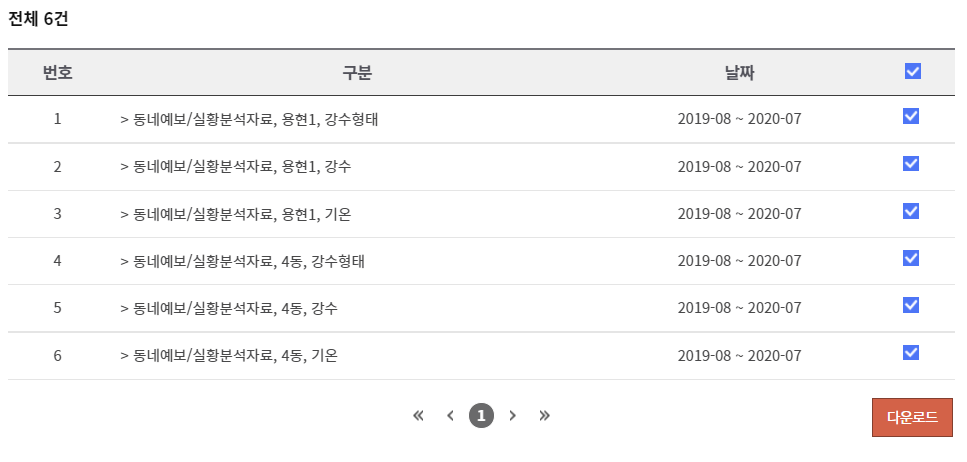

원래의 계획은 이렇게 다운받은 데이터를 구글 클라우드에 올리고, 코랩에서 압축두번 풀고 바로 작업하는 것이었다. 그러나 기상자료개방포털에서 위와같이 파일이름이 ,로 구분됨에 따라(다운로드 하면 _로 바뀐다) 숭의 1,3동/도화2,3동/용현1,4동 과 같이 ,로 구분된 지역이 파일이 나뉘어 게재되고, 다운로드 되었다. 실제 데이터는 4동과 같이 뒷부분 이름에만 들어있다. 코랩에서는 이것을 파악하기 어려워서 윈도우에서 압축을 풀고 파일명을 바꾸거나 몇개의 파일을 삭제한 뒤 csv파일만 남긴 후 압축하여 구글 드라이브로 다시 업로드 하였다.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#우분투에서 다운받아 파일이름의 한글이 깨지므로 압축을 해제할 때 인코딩을 지정해주자.
!unzip -O cp949 '/content/drive/MyDrive/weathers/weathers.zip' -d '/content/'

In [5]:
file_list = glob.glob('/content/weathers/*.csv')
print(file_list[0])
len(file_list)

/content/weathers/청천2동_강수형태_202108_202108.csv


31596

In [6]:
rain_list=[]
temp_list=[]
rainSnow_list=[]


for fname in file_list:
  # print(fname)
  if len(fname.split("_"))>4: #대정읍_마라도포함_강수_201908_202007 (9개존재)
    if fname.split("_")[2].endswith('강수형태'):
      rainSnow_list.append(fname)
    if fname.split("_")[2].endswith('기온'):
      temp_list.append(fname)
    if fname.split("_")[2].endswith('강수'):
      rain_list.append(fname)
  else:
    if fname.split("_")[1].endswith('강수형태'):
      rainSnow_list.append(fname)
    if fname.split("_")[1].endswith('기온'):
      temp_list.append(fname)
    if fname.split("_")[1].endswith('강수'):
      rain_list.append(fname)
  
del file_list

총 31590개의 데이터가 필요한데 내가 다운받으면서 6개가 중복으로 들어간것 같다. </br>
31590/3 = 10530 개씩 강수, 강수형태, 기온 데이터가 존재해야하는데 부족하지 않으므로 나중에 duplicate로 살펴보는 것으로 하자.

In [ ]:
print("rain_list",len(rain_list))
print("temp_list",len(temp_list))
print("rainSnow_list",len(rainSnow_list))
temp_list[-20:]

rain_list 10532
temp_list 10533
rainSnow_list 10531


['/content/weathers/일신동_기온_201908_202007.csv',
 '/content/weathers/강진면_기온_202108_202108.csv',
 '/content/weathers/삼각산동_기온_202108_202108.csv',
 '/content/weathers/안심4동_기온_201908_202007.csv',
 '/content/weathers/심천면_기온_201908_202007.csv',
 '/content/weathers/의흥면_기온_202108_202108.csv',
 '/content/weathers/박달2동_기온_202008_202107.csv',
 '/content/weathers/삼기면_기온_201908_202007.csv',
 '/content/weathers/망우제3동_기온_202008_202107.csv',
 '/content/weathers/신창면_기온_201908_202007.csv',
 '/content/weathers/풍호동_기온_202108_202108.csv',
 '/content/weathers/내이동_기온_202008_202107.csv',
 '/content/weathers/봉강면_기온_202008_202107.csv',
 '/content/weathers/증산동_기온_202108_202108.csv',
 '/content/weathers/금곡동_기온_202008_202107 (3).csv',
 '/content/weathers/온양읍_기온_202008_202107.csv',
 '/content/weathers/음성읍_기온_202108_202108.csv',
 '/content/weathers/안암동_기온_202108_202108.csv',
 '/content/weathers/정자2동_기온_202108_202108.csv',
 '/content/weathers/내남면_기온_202008_202107.csv']

In [7]:
RAIN = np.array(rain_list)
TEMP = np.array(temp_list)
RAINSNOW = np.array(rainSnow_list)
rain_split = np.array_split(RAIN,2)
temp_split = np.array_split(TEMP,2)
rainSnow_split = np.array_split(RAINSNOW,2)

rain1 = rain_split[0]
rain2 = rain_split[1]
temp1 = temp_split[0]
temp2 = temp_split[1]
rainSnow1 = rainSnow_split[0]
rainSnow2 = rainSnow_split[1]

In [8]:
print(len(rain1),len(rain2),len(temp1), len(temp2), len(rainSnow1),len(rainSnow2))

5266 5266 5267 5266 5266 5265


In [10]:
temp1[:20]

array(['/content/weathers/대명6동_기온_202008_202107.csv',
       '/content/weathers/화북면_기온_202108_202108 (2).csv',
       '/content/weathers/안평면_기온_201908_202007.csv',
       '/content/weathers/구미동_기온_202008_202107.csv',
       '/content/weathers/봉암동_기온_201908_202007.csv',
       '/content/weathers/행신2동_기온_202108_202108.csv',
       '/content/weathers/부개3동_기온_201908_202007.csv',
       '/content/weathers/추자면_기온_202008_202107.csv',
       '/content/weathers/오금동_기온_202108_202108.csv',
       '/content/weathers/삼도동_기온_202008_202107.csv',
       '/content/weathers/상인3동_기온_202108_202108.csv',
       '/content/weathers/삼송동_기온_201908_202007.csv',
       '/content/weathers/선부2동_기온_202108_202108.csv',
       '/content/weathers/상월면_기온_201908_202007.csv',
       '/content/weathers/시천면_기온_202108_202108.csv',
       '/content/weathers/광적면_기온_202008_202107.csv',
       '/content/weathers/부암제1동_기온_202008_202107.csv',
       '/content/weathers/용산동_기온_202008_202107.csv',
       '/content/weathers/관저2동_기온_2

In [9]:
temp2[:20]

array(['/content/weathers/용현2동_기온_202108_202108.csv',
       '/content/weathers/의정부1동_기온_202108_202108.csv',
       '/content/weathers/함평읍_기온_202108_202108.csv',
       '/content/weathers/삼성1동_기온_201908_202007.csv',
       '/content/weathers/화곡제3동_기온_202008_202107.csv',
       '/content/weathers/창녕읍_기온_202108_202108.csv',
       '/content/weathers/괴정동_기온_201908_202007.csv',
       '/content/weathers/상봉제1동_기온_202008_202107.csv',
       '/content/weathers/개포면_기온_202008_202107.csv',
       '/content/weathers/정림동_기온_202008_202107.csv',
       '/content/weathers/월등면_기온_202108_202108.csv',
       '/content/weathers/내일동_기온_201908_202007.csv',
       '/content/weathers/중앙동_기온_202108_202108 (16).csv',
       '/content/weathers/황남동_기온_202008_202107.csv',
       '/content/weathers/성내3동_기온_202108_202108.csv',
       '/content/weathers/합덕읍_기온_201908_202007.csv',
       '/content/weathers/하점면_기온_202108_202108.csv',
       '/content/weathers/입장면_기온_202008_202107.csv',
       '/content/weathers/양주2동_기

In [ ]:
for item in rain_list:
  if item.split("_")[0].endswith('용현1,4동'):
    print(item)

/content/weathers/용현1,4동_강수_202108_202108.csv
/content/weathers/용현1,4동_강수_202008_202107.csv
/content/weathers/용현1,4동_강수_201908_202007.csv


## 1.2 데이터 파악하기

* 첫번째 열 이름은 ' format: day'이고 마지막 열 이름은 'value location:81_91 Start : 20190801 '이다. **공백 주의**.
* value_location의 값은 **격자 X_격자 Y**값이다.
* 첫 시작일은 'value location:81_91 Start : 20190801 '에서 얻을 수 있고, day가 마지막 날이 되면 ' format: day'에 'Start : 20190901' 형태로 다음달 첫날 등장한다.

In [ ]:
sample = pd.read_csv('/content/weathers/가천면_강수_201908_202007.csv')
sample

format: day    hour  value location:81_91 Start : 20190801 
0               1     0.0                                     0.0
1               1   100.0                                     0.0
2               1   200.0                                     0.0
3               1   300.0                                     0.0
4               1   400.0                                     0.0
...           ...     ...                                     ...
8790           31  1900.0                                     0.0
8791           31  2000.0                                     0.0
8792           31  2100.0                                     0.0
8793           31  2200.0                                     0.0
8794           31  2300.0                                     0.0

[8795 rows x 3 columns]

In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8795 entries, 0 to 8794
Data columns (total 3 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0    format: day                            8795 non-null   object 
 1   hour                                    8784 non-null   float64
 2   value location:81_91 Start : 20190801   8784 non-null   float64
dtypes: float64(2), object(1)
memory usage: 206.3+ KB


In [ ]:
sample.columns

Index([' format: day', 'hour', 'value location:81_91 Start : 20190801 '], dtype='object')

In [ ]:
sample[740:750]

format: day    hour  value location:81_91 Start : 20190801 
740                  31  2000.0                                     0.0
741                  31  2100.0                                     0.0
742                  31  2200.0                                     0.0
743                  31  2300.0                                     0.0
744   Start : 20190901      NaN                                     NaN
745                   1     0.0                                     0.0
746                   1   100.0                                     0.0
747                   1   200.0                                     0.0
748                   1   300.0                                     0.0
749                   1   400.0                                     0.0

> 마지막에는 **outer join으로 합치기!**
http://www.gisdeveloper.co.kr/?p=8255

# 2. 대용량 데이터프레임 다루기

csv파일은 아래와 같이 날짜에는 1~ 마지막날까지 써있고 각 일자별로 0~23시까지 시간대별로 데이터가 존재한다. 한달단위로 데이터가 쓰여진 뒤에는 `Start : 20201001`처럼 날짜 열에 다음달의 시작일자가 등장한다. </br>
이것을 이제 배달데이터 처럼 **날짜를 년과 달을 붙여서 나타내고**, 이 데이터에는 지역이 적혀있지 않으니 새롭게 **읍면동, 격자X, 격자 Y라는 열을 만들어** 데이터를 넣어줄 것이다. 문제는 데이터가 너무나 많아서 3가지 방법 중 **어떤 방법으로 시도해도 램이 감당하지 못하고 터져버리는 것**이다. 어떻게 해결하면 좋을까?

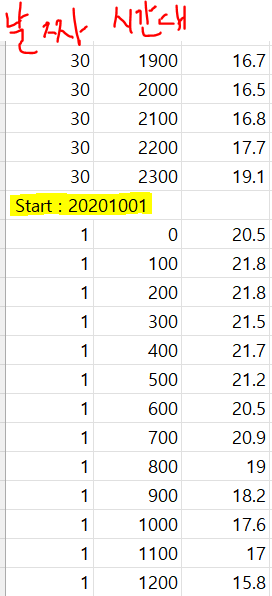

In [ ]:
location = pd.read_excel('/content/drive/MyDrive/동네예보 지점 좌표(위도 경도)_(20211001 기준).xlsx', engine='openpyxl')
location

구분      행정구역코드      1단계   2단계  ...   경도(초/100)  위도(초/100)  위치업데이트  Unnamed: 16
0     kor  1100000000    서울특별시   NaN  ...  126.980008  37.563569     NaN          NaN
1     kor  1111000000    서울특별시   종로구  ...  126.981642  37.570378     NaN          NaN
2     kor  1111051500    서울특별시   종로구  ...  126.970652  37.584137     NaN          NaN
3     kor  1111053000    서울특별시   종로구  ...  126.970956  37.573269     NaN          NaN
4     kor  1111054000    서울특별시   종로구  ...  126.983978  37.582425     NaN          NaN
...   ...         ...      ...   ...  ...         ...        ...     ...          ...
3774  kor  5013060000  제주특별자치도  서귀포시  ...  126.479575  33.247475     NaN          NaN
3775  kor  5013061000  제주특별자치도  서귀포시  ...  126.436778  33.248178     NaN          NaN
3776  kor  5013062000  제주특별자치도  서귀포시  ...  126.399908  33.251025     NaN          NaN
3777  kor  5019000000      이어도   NaN  ...    0.000000   0.000000     NaN          NaN
3778  kor  5019099000      이어도   NaN  ...    0.000000   0.000000     NaN          NaN

[3779 rows x 17 columns]

In [ ]:
location.columns

Index(['구분', '행정구역코드', '1단계', '2단계', '3단계', '격자 X', '격자 Y', '경도(시)', '경도(분)',
       '경도(초)', '위도(시)', '위도(분)', '위도(초)', '경도(초/100)', '위도(초/100)', '위치업데이트',
       'Unnamed: 16'],
      dtype='object')

In [ ]:
location = location[['1단계', '2단계', '3단계', '격자 X', '격자 Y']]
location

1단계   2단계    3단계  격자 X  격자 Y
0       서울특별시   NaN    NaN    60   127
1       서울특별시   종로구    NaN    60   127
2       서울특별시   종로구  청운효자동    60   127
3       서울특별시   종로구    사직동    60   127
4       서울특별시   종로구    삼청동    60   127
...       ...   ...    ...   ...   ...
3774  제주특별자치도  서귀포시    대천동    52    32
3775  제주특별자치도  서귀포시    중문동    51    32
3776  제주특별자치도  서귀포시    예래동    50    32
3777      이어도   NaN    NaN    28     8
3778      이어도   NaN    NaN    28     8

[3779 rows x 5 columns]

## 방법1. 루프를 돌때마다 concat으로 합쳐주기

### **절대! 금지!** 하루종일해도 결과를 얻을 수 없다.

In [ ]:
rain_df = pd.DataFrame(columns=['날짜', '시간대', '읍면동', '강수형태','격자 X','격자 Y'])

In [ ]:
rain_df

Empty DataFrame
Columns: [날짜, 시간대, 읍면동, 강수, 격자 X, 격자 Y]
Index: []

데이터프레임을 일일히 읽어서 합치는것은 매우 오래 걸리므로 다른 곳으로 이동하고 싶다면 중간에 코랩의 런타임을 유지시키기 위해 F12를 눌러 콘솔에
아래의 코드를 붙여넣고 엔터를 누르자. 30분에 한번씩 코랩의 툴바가 클릭될 것이다.

```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button").click() 
}setInterval(ClickConnect, 1800000)
```




In [ ]:
for fname in rain_list:
  df = pd.read_csv(fname)
  start_date = df.columns[-1].strip()[-8:-2]
  
  level3 = fname.split("_")[0].split('/')[-1] 
  if level3=='대정읍': #대정읍_마라도포함_강수_201908_202007
    level3='대정읍,마라도'
  
  '''컬럼 추가 후 값 넣기'''
  xy=df.columns[2].split(':')[1].split()[0].split("_")
  df.columns = ['날짜','시간대','강수']
  df.loc[:,'읍면동'] = level3 
  df.loc[:,'격자 X'] = xy[0]
  df.loc[:,'격자 Y'] = xy[1]
  
  '''날짜 col 재정의'''
  df = df.astype({'날짜': 'string'})
  for i in range(len(df)):
    if df.loc[i,'날짜'].startswith(' Start'):
      start_date = df.loc[i,'날짜'][-9:-3] #
      continue
    df.loc[i,'날짜'] = start_date + df.loc[i,'날짜'] #이부분이 시간이 가장 오래걸림!
  
  '''재정렬 및 합치기'''
  df = df[['날짜', '시간대', '읍면동', '강수','격자 X','격자 Y']]
  rain_df = pd.concat([rain_df, df], ignore_index=True)

'''날짜 col 정제'''
rain_df = rain_df.drop(rain_df[rain_df['날짜'].str.startswith(' Start')].index) #시작일시 삭제
rain_df['날짜'] = pd.to_datetime(rain_df['날짜'], format='%Y%m %d')#datetime형식으로 변환

'''시간대바꾸기'''
rain_df= rain_df.astype({'시간대': 'int'}) 
rain_df.loc[:,'시간대'] = [hour//100 if hour != 0 else hour for hour in rain_df['시간대']]

rain_df  

In [ ]:
rain_df.to_csv('/content/drive/MyDrive/강수_2019_2021.csv',index=False, encoding="utf-8-sig")
rain_df.to_excel('/content/drive/MyDrive/강수_2019_2021.xlsx',index=False, encoding="utf-8-sig")

> 메모리 덜 쓰고 Pandas DataFrame 병합을 빠르게 하는 방법(여러 개의 용량 큰 파일) : https://emilkwak.github.io/pandas-dataframe-concat-efficiently

나는 그런데 그대로 병합하면 안되고, 각 프레임별로 읍면동, 격자X, 격자 Y데이터를 함께 붙여야 한다.

## 방법 2. 모든 데이터를 리스트에 각각 담아서 열로 붙이기

완료되기까지 **50분**이 걸리지 않지만...저장하고있는 리스트가 너무 많아서 코랩의 일반유저는 **램**이 한정되어 있어서 **램이 꽉차서** 세션이 다운되고 **런타임이 초기화**된다...

In [ ]:
temp_df = pd.DataFrame(columns=['날짜', '시간대','읍면동', '기온','격자X','격자Y'])
temp_df

Empty DataFrame
Columns: [날짜, 시간대, 읍면동, 기온, 격자X, 격자Y]
Index: []

In [ ]:
date=[]
level3_list=[]
x=[]
y=[]
hour=[]
temp=[]

for j,fname in enumerate(temp_list):
  print(j)
  df = pd.read_csv(fname)

  '''필요한 날짜, 격자X, 격자 Y, 읍면동 정보 얻기'''
  start_date = df.columns[-1].strip()[-8:-2]
  xy=df.columns[2].split(':')[1].split()[0].split("_")
  level3 = fname.split("_")[0].split('/')[-1] 
  if level3=='대정읍': #대정읍_마라도포함_강수_201908_202007
    level3='대정읍,마라도'
  
  '''컬럼명 재정의'''
  df.columns = ['날짜','시간대','기온']
  
  '''Start검색을 위해 날짜 컬럼 string 타입으로 변경'''
  df = df.astype({'날짜': 'string'})
  for i in range(len(df)):
    if df.loc[i,'날짜'].startswith(' Start'):
      start_date = df.loc[i,'날짜'][-9:-3] #
      continue
    date.append(start_date + df.loc[i,'날짜'])
    level3_list.append(level3)
    x.append(xy[0])
    y.append(xy[1])
    hour.append(df.loc[i,'시간대'])
    temp.append(df.loc[i,'기온'])

In [ ]:
'''데이터 프레임의 열로 합치기'''
temp_df['날짜'] = date
temp_df['시간대'] = hour
temp_df['읍면동'] = level3_list
temp_df['기온'] = temp
temp_df['격자X'] = x
temp_df['격자Y'] = y

'''날짜 col 정제'''
# temp_df = temp_df.drop(temp_df[temp_df['날짜'].str.startswith(' Start')].index) #시작일시 삭제
temp_df['날짜'] = pd.to_datetime(temp_df['날짜'], format='%Y%m %d')#datetime형식으로 변환

'''시간대 배달데이터 형태로 바꾸기'''
temp_df= temp_df.astype({'시간대': 'int'}) 
temp_df.loc[:,'시간대'] = [hour//100 if hour != 0 else hour for hour in temp_df['시간대']]

temp_df 

In [ ]:
temp_df.to_csv('/content/drive/MyDrive/온도_2019_2021.csv',index=False, encoding="utf-8-sig")
temp_df.to_excel('/content/drive/MyDrive/온도_2019_2021.xlsx',index=False, encoding="utf-8-sig")

## 방법3. 데이터프레임을 리스트에 담아서 concat 제대로 활용하기


방법1의 경우 루프를 돌때마다 concat을 사용하는 방법으로 이렇게 concat함수를 동적으로 사용하는 것은 concat의 이점을 리지 못해 append보다 더 오래 걸릴 수 있다. 따라서 결합할 데이터프레임을 먼저 리스트로 모아주고, concat함수에서 이를 인자로 받아 활용하면 더욱 빠르게 데이터프레임을 결합할 수 있다.

이렇게하면 실행시간은 **단 30분!**

In [ ]:
rainSnow_df = pd.DataFrame(columns=['날짜', '시간대','읍면동','강수형태','격자X','격자Y'])
rainSnow_df

Empty DataFrame
Columns: [날짜, 시간대, 읍면동, 강수형태, 격자X, 격자Y]
Index: []

In [ ]:
concat_list=[]
date=[]
for j,fname in enumerate(rainSnow_list):
  print(j)
  df = pd.read_csv(fname)
  start_date = df.columns[-1].strip()[-8:-2]
  
  level3 = fname.split("_")[0].split('/')[-1] 
  if level3=='대정읍': #대정읍_마라도포함_강수_201908_202007
    level3='대정읍,마라도'
  
  '''컬럼 추가 후 값 넣기'''
  xy=df.columns[2].split(':')[1].split()[0].split("_")
  df.columns = ['날짜','시간대','강수형태']
  df.loc[:,'읍면동'] = level3 
  df.loc[:,'격자 X'] = xy[0]
  df.loc[:,'격자 Y'] = xy[1]
  
  '''날짜 col 재정의'''
  df = df.astype({'날짜': 'string'})
  for i in range(len(df)):
    if df.loc[i,'날짜'].startswith(' Start'):
      start_date = df.loc[i,'날짜'][-9:-3] #
      continue
    # df.loc[i,'날짜'] = start_date + df.loc[i,'날짜']
    date.append(start_date + df.loc[i,'날짜'])
  
  '''재정렬 및 합칠 데이터프레임 리스트 만들기'''
  df = df[['날짜', '시간대', '읍면동', '강수형태','격자 X','격자 Y']]
  concat_list.append(df)


In [ ]:
len(date)

64207728

저장하는 과정까지는 램이 넉넉하게 남아있다. 하지만 concat과정에서 램이 꽉차서 세션이 다운된다.

In [ ]:
rainSnow_df = pd.concat(concat_list, ignore_index=True)

'''날짜 col 정제'''
rainSnow_df = rainSnow_df.drop(rainSnow_df[rainSnow_df['날짜'].str.startswith(' Start')].index) #시작일시 삭제
rainSnow_df['날짜'] = date
rainSnow_df['날짜'] = pd.to_datetime(rainSnow_df['날짜'], format='%Y%m %d')#datetime형식으로 변환

'''시간대 배달데이터 형태로 바꾸기'''
rainSnow_df= rainSnow_df.astype({'시간대': 'int'}) 
rainSnow_df.loc[:,'시간대'] = [hour//100 if hour != 0 else hour for hour in rainSnow_df['시간대']]

rainSnow_df

In [ ]:
rainSnow_df.to_csv('/content/drive/MyDrive/강수형태_2019_2021.csv',index=False, encoding="utf-8-sig")
rainSnow_df.to_excel('/content/drive/MyDrive/강수형태_2019_2021.xlsx',index=False, encoding="utf-8-sig")

## 방법4. np.where과 ffill()을 사용하기 (😃 3분 30초!) 
1. 새컬럼 생성 -> np.where로 Start들어있는 행에서 날짜 뽑아넣기  Start 없는 행은 np.nan으로 채우기</br>
df['newcol']= [20200101,np.nan,np.nan.....20200101,np.nan,np.nan...]
2. df['newcol'].ffill ()
하면 앞에서부터 찰것 같긴해요
3. list comprehension 로 시간대가 nan인 행(원래 start들어있던 행) False로 반환 받아서 df.loc[list comprehension])으로 삭제 

**이렇게하면 for문이 파일 이름 읽어올 때 빼고는 필요 없어서 실행시간이 엄청 빠르다!**

> Pandas - 대용량데이터 전처리 꿀팁 (멀티인덱스, groupby, isin,...) </br>
https://developer-ping9.tistory.com/122

In [ ]:
pd.read_csv('/content/weathers/대정읍_마라도포함_강수_201908_202007.csv')

format: day    hour  value location:48_32 Start : 20190801 
0               1     0.0                                     0.0
1               1   100.0                                     0.0
2               1   200.0                                     0.0
3               1   300.0                                     0.0
4               1   400.0                                     0.0
...           ...     ...                                     ...
8790           31  1900.0                                     0.0
8791           31  2000.0                                     0.0
8792           31  2100.0                                     0.0
8793           31  2200.0                                     0.0
8794           31  2300.0                                     0.0

[8795 rows x 3 columns]

In [ ]:
#대정읍_마라도포함은 3단계에 어떻게 썼을까?
location[(location['격자 X']==48) & (location['격자 Y']==32)]

구분      행정구역코드    1단계  ...  위도(초/100)      위치업데이트  Unnamed: 16
946   kor  2826051500  인천광역시  ...  37.561661         NaN          NaN
964   kor  2826070000  인천광역시  ...  37.591114  20180705.0          NaN
965   kor  2826071000  인천광역시  ...  37.591172  20180705.0          NaN
968   kor  2826074000  인천광역시  ...  37.594000  20210601.0          NaN
1744  kor  4157055000    경기도  ...  37.602025         NaN          NaN

[5 rows x 17 columns]

In [ ]:
concat_list=[]

for j,fname in enumerate(rainSnow_list):
  if j%10 ==0: 
    print(j)
  df = pd.read_csv(fname)
  start_date = df.columns[-1].strip()[-8:-2]
  xy=df.columns[2].split(':')[1].split()[0].split("_")
  df.columns = ['날짜','시간대','강수형태']
  df = df.astype({'날짜': 'string'})
  
  '''날짜 col 재정의'''
  df['new'] = np.where(df['시간대'].isna(), df['날짜'] , np.nan) # Start들어있는 행에서 날짜 뽑아넣기 Start 없는 행은 np.nan으로 채우기
  df['new'] = df['new'].apply(lambda x : x[-9:-3] if str(x).startswith(' S') else x)
  df.loc[0, 'new'] = start_date
  df['new'] = df['new'].ffill()
  df['new']=df['new']+df['날짜']
  df = df.drop(df[df['시간대'].isna()].index) #원래 start들어있던 행 지우기
  df = df.drop(['날짜'], axis = 1) #기존 날짜 행 지우고
  df.columns = ['시간대','강수형태','날짜'] #new열을 날짜 열로 새롭게 정의
  
  level3 = fname.split("_")[0].split('/')[-1] 
  if level3=='대정읍': #대정읍_마라도포함_강수_201908_202007
    level3='대정읍,마라도'
  
  '''컬럼 추가 후 값 넣기'''
  df['읍면동'] = level3 
  df['격자 X'] = xy[0]
  df['격자 Y'] = xy[1]
  
  '''재정렬 및 합칠 데이터프레임 리스트 만들기'''
  df = df[['날짜', '시간대', '읍면동', '강수형태','격자 X','격자 Y']]
  concat_list.append(df)
  
  '''리스트에 담은 후에는 삭제'''
  del df,start_date,xy,level3
gc.collect()

😙이렇게 격자 X, 격자 Y를 넣지 안고 광역시도 시군구 다른 데이터프레임에서 찾아서 바로 넣어도 **5분**


In [ ]:
concat_list=[]
error_list=[]

for j,fname in enumerate(rainSnow_list):
  if j%10 ==0: 
    print(j)
  df = pd.read_csv(fname)
  start_date = df.columns[-1].strip()[-8:-2]
  xy=np.array(df.columns[2].split(':')[1].split()[0].split("_"), dtype=int)
  df.columns = ['날짜','시간대','강수형태']
  df = df.astype({'날짜': 'string'})
  
  '''날짜 col 재정의'''
  df['new'] = np.where(df['시간대'].isna(), df['날짜'] , np.nan) # Start들어있는 행에서 날짜 뽑아넣기 Start 없는 행은 np.nan으로 채우기
  df['new'] = df['new'].apply(lambda x : x[-9:-3] if str(x).startswith(' S') else x)
  df.loc[0, 'new'] = start_date
  df['new'] = df['new'].ffill()
  df['new']=df['new']+df['날짜']
  df = df.drop(df[df['시간대'].isna()].index) #원래 start들어있던 행 지우기
  df = df.drop(['날짜'], axis = 1) #기존 날짜 행 지우고
  df.columns = ['시간대','강수형태','날짜'] #new열을 날짜 열로 새롭게 정의
  
  level3 = fname.split("_")[0].split('/')[-1] 
  if level3=='대정읍': #대정읍_마라도포함_강수_201908_202007
    level3='대정읍/마라도포함'
  
  try:
    SiDo = location[(location['격자 X']==xy[0]) & (location['격자 Y']==xy[1]) & (location['3단계']==level3)]['1단계'].values[0]
    SiGunGu = location[(location['격자 X']==xy[0]) & (location['격자 Y']==xy[1]) & (location['3단계']==level3)]['2단계'].values[0]
    
    '''컬럼 추가 후 값 넣기'''
    df['읍면동'] = level3 
    df['광역시도'] = SiDo
    df['시군구'] = SiGunGu                  
    
    '''재정렬 및 합칠 데이터프레임 리스트 만들기'''
    df = df[['광역시도','시군구','읍면동', '날짜', '시간대',  '강수형태']]
    concat_list.append(df)

  except:
    error_list.append((xy[0],xy[1],level3, fname))

  '''리스트에 담은 후에는 삭제'''
  del df,start_date,xy,level3

gc.collect()

In [ ]:
error_list

[]

하지만 여기서 여전히 램이 초과된다. 자 이제 방법을 알았으니 리스트를 나눠서 작업하면 되겠군! 

In [ ]:
rainSnow_df = pd.concat(concat_list, ignore_index=True)

### 연습

In [ ]:
rainSnow_df = pd.concat(concat_list, ignore_index=True)

'''날짜 col 정제'''
rainSnow_df = rainSnow_df.drop(rainSnow_df[rainSnow_df['날짜'].str.startswith(' Start')].index) #시작일시 삭제
rainSnow_df['날짜'] = date
rainSnow_df['날짜'] = pd.to_datetime(rainSnow_df['날짜'], format='%Y%m %d')#datetime형식으로 변환

'''시간대 배달데이터 형태로 바꾸기'''
rainSnow_df= rainSnow_df.astype({'시간대': 'int'}) 
rainSnow_df.loc[:,'시간대'] = [hour//100 if hour != 0 else hour for hour in rainSnow_df['시간대']]

rainSnow_df



In [ ]:
df = pd.read_csv('/content/weathers/가천면_강수_201908_202007.csv')

In [ ]:
df['new'] = np.where(df[' format: day'].str.startswith(' Start'), df[' format: day'] , np.nan) #조건, True, False
df['new'] 

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8790    NaN
8791    NaN
8792    NaN
8793    NaN
8794    NaN
Name: new, Length: 8795, dtype: object

In [ ]:
df['new'] = df['new'].apply(lambda x : x[-9:-3] if str(x).startswith(' S') else x)

In [ ]:
df[df['new'].notna()]

format: day  hour  value location:81_91 Start : 20190801      new
744    Start : 20190901    NaN                                     NaN  201909
1465   Start : 20191001    NaN                                     NaN  201910
2210   Start : 20191101    NaN                                     NaN  201911
2931   Start : 20191201    NaN                                     NaN  201912
3676   Start : 20200101    NaN                                     NaN  202001
4421   Start : 20200201    NaN                                     NaN  202002
5118   Start : 20200301    NaN                                     NaN  202003
5863   Start : 20200401    NaN                                     NaN  202004
6584   Start : 20200501    NaN                                     NaN  202005
7329   Start : 20200601    NaN                                     NaN  202006
8050   Start : 20200701    NaN                                     NaN  202007

In [ ]:
df[df['new'].isna()]

format: day    hour  value location:81_91 Start : 20190801   new
0               1     0.0                                     0.0  NaN
1               1   100.0                                     0.0  NaN
2               1   200.0                                     0.0  NaN
3               1   300.0                                     0.0  NaN
4               1   400.0                                     0.0  NaN
...           ...     ...                                     ...  ...
8790           31  1900.0                                     0.0  NaN
8791           31  2000.0                                     0.0  NaN
8792           31  2100.0                                     0.0  NaN
8793           31  2200.0                                     0.0  NaN
8794           31  2300.0                                     0.0  NaN

[8784 rows x 4 columns]

In [ ]:
df.loc[0, 'new'] = df.columns[-2].strip()[-8:-2]
df

format: day    hour  value location:81_91 Start : 20190801      new
0               1     0.0                                     0.0  201908
1               1   100.0                                     0.0     NaN
2               1   200.0                                     0.0     NaN
3               1   300.0                                     0.0     NaN
4               1   400.0                                     0.0     NaN
...           ...     ...                                     ...     ...
8790           31  1900.0                                     0.0     NaN
8791           31  2000.0                                     0.0     NaN
8792           31  2100.0                                     0.0     NaN
8793           31  2200.0                                     0.0     NaN
8794           31  2300.0                                     0.0     NaN

[8795 rows x 4 columns]

In [ ]:
df['new'] = df['new'].ffill()
df

format: day    hour  value location:81_91 Start : 20190801      new
0               1     0.0                                     0.0  201908
1               1   100.0                                     0.0  201908
2               1   200.0                                     0.0  201908
3               1   300.0                                     0.0  201908
4               1   400.0                                     0.0  201908
...           ...     ...                                     ...     ...
8790           31  1900.0                                     0.0  202007
8791           31  2000.0                                     0.0  202007
8792           31  2100.0                                     0.0  202007
8793           31  2200.0                                     0.0  202007
8794           31  2300.0                                     0.0  202007

[8795 rows x 4 columns]

In [ ]:
df['new']=df['new']+df[' format: day']
df

format: day    hour  value location:81_91 Start : 20190801         new
0               1     0.0                                     0.0   201908 1
1               1   100.0                                     0.0   201908 1
2               1   200.0                                     0.0   201908 1
3               1   300.0                                     0.0   201908 1
4               1   400.0                                     0.0   201908 1
...           ...     ...                                     ...        ...
8790           31  1900.0                                     0.0  202007 31
8791           31  2000.0                                     0.0  202007 31
8792           31  2100.0                                     0.0  202007 31
8793           31  2200.0                                     0.0  202007 31
8794           31  2300.0                                     0.0  202007 31

[8795 rows x 4 columns]

In [ ]:
df = df.drop(df[df['hour'].isna()].index)
df = df.drop([' format: day'], axis = 1)
df

hour  value location:81_91 Start : 20190801         new
0        0.0                                     0.0   201908 1
1      100.0                                     0.0   201908 1
2      200.0                                     0.0   201908 1
3      300.0                                     0.0   201908 1
4      400.0                                     0.0   201908 1
...      ...                                     ...        ...
8790  1900.0                                     0.0  202007 31
8791  2000.0                                     0.0  202007 31
8792  2100.0                                     0.0  202007 31
8793  2200.0                                     0.0  202007 31
8794  2300.0                                     0.0  202007 31

[8784 rows x 3 columns]

# 3. ✅데이터프레임으로 만들기


In [11]:
location = pd.read_excel('/content/drive/MyDrive/동네예보 지점 좌표(위도 경도)_(20211001 기준).xlsx', engine='openpyxl')
location = location[['1단계', '2단계', '3단계', '격자 X', '격자 Y']]
location

1단계   2단계    3단계  격자 X  격자 Y
0       서울특별시   NaN    NaN    60   127
1       서울특별시   종로구    NaN    60   127
2       서울특별시   종로구  청운효자동    60   127
3       서울특별시   종로구    사직동    60   127
4       서울특별시   종로구    삼청동    60   127
...       ...   ...    ...   ...   ...
3774  제주특별자치도  서귀포시    대천동    52    32
3775  제주특별자치도  서귀포시    중문동    51    32
3776  제주특별자치도  서귀포시    예래동    50    32
3777      이어도   NaN    NaN    28     8
3778      이어도   NaN    NaN    28     8

[3779 rows x 5 columns]

## 3.1 강수형태

> 참고 : 기상자료개방포털의 자료실 /  동네예보 자료설명 및 포맷정보 </br>

코드형태로 기록되어 있는 강수형태를 변환하는 작업이 필요하다.

In [ ]:
concat_list=[]
error_list=[]

for j,fname in enumerate(rainSnow1):
  if j%10 ==0: 
    print(j)
  df = pd.read_csv(fname)
  start_date = df.columns[-1].strip()[-8:-2] + " "
  xy=np.array(df.columns[2].split(':')[1].split()[0].split("_"), dtype=int)
  df.columns = ['날짜','시간대','강수형태']
  df = df.astype({'날짜': 'string'})
  
  '''날짜 col 재정의'''
  df['new'] = np.where(df['시간대'].isna(), df['날짜'] , np.nan) # Start들어있는 행에서 날짜 뽑아넣기 Start 없는 행은 np.nan으로 채우기
  df['new'] = df['new'].apply(lambda x : x[-9:-3] if str(x).startswith(' S') else x)
  df.loc[0, 'new'] = start_date
  df['new'] = df['new'].ffill()
  df['new']=df['new']+df['날짜']
  df = df.drop(df[df['시간대'].isna()].index) #원래 start들어있던 행 지우기
  df = df.drop(['날짜'], axis = 1) #기존 날짜 행 지우고
  df.columns = ['시간대','강수형태','날짜'] #new열을 날짜 열로 새롭게 정의
  
  level3 = fname.split("_")[0].split('/')[-1] 
  if level3=='대정읍': #대정읍_마라도포함_강수_201908_202007
    level3='대정읍/마라도포함'
  
  try:
    SiDo = location[(location['격자 X']==xy[0]) & (location['격자 Y']==xy[1]) & (location['3단계']==level3)]['1단계'].values[0]
    SiGunGu = location[(location['격자 X']==xy[0]) & (location['격자 Y']==xy[1]) & (location['3단계']==level3)]['2단계'].values[0]
    
    '''컬럼 추가 후 값 넣기'''
    df['읍면동'] = level3 
    df['광역시도'] = SiDo
    df['시군구'] = SiGunGu 

    '''강수형태 코드 변환'''
    df = df.astype({'강수형태': 'int'})
    # -1 : missing
    rainSnow_dict =  { -1 : np.nan, 0 : '없음', 1: '비', 2:'비/눈', 3: '눈', 4: '소나기'} 
    df['강수형태'] = df['강수형태'].map(rainSnow_dict)         
    
    '''시간대 배달데이터 형태로 바꾸기'''
    df = df.astype({'시간대': 'int'})
    df['시간대'] = [hour//100 if hour != 0 else hour for hour in df['시간대']]

    '''datetime형식으로 변환'''
    df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m %d')
    
    '''재정렬 및 합칠 데이터프레임 리스트 만들기'''
    df = df[['광역시도','시군구','읍면동', '날짜', '시간대',  '강수형태']]

    concat_list.append(df)
    
  except:
    error_list.append((xy[0],xy[1],level3, fname))

  '''리스트에 담은 후에는 삭제'''
  del df,start_date,xy,level3

gc.collect()

In [ ]:
error_list

[]

In [ ]:
'''데이터프레임 합치기/2'''
rainSnow_df1 = pd.concat(concat_list, ignore_index=True)
rainSnow_df1

광역시도     시군구   읍면동         날짜  시간대 강수형태
0         충청남도  천안시서북구  성정2동 2021-08-01    0   없음
1         충청남도  천안시서북구  성정2동 2021-08-01    1   없음
2         충청남도  천안시서북구  성정2동 2021-08-01    2   없음
3         충청남도  천안시서북구  성정2동 2021-08-01    3   없음
4         충청남도  천안시서북구  성정2동 2021-08-01    4   없음
...        ...     ...   ...        ...  ...  ...
32344507  전라남도     영광군   군서면 2020-07-31   19   없음
32344508  전라남도     영광군   군서면 2020-07-31   20   없음
32344509  전라남도     영광군   군서면 2020-07-31   21   없음
32344510  전라남도     영광군   군서면 2020-07-31   22   없음
32344511  전라남도     영광군   군서면 2020-07-31   23   없음

[32344512 rows x 6 columns]

In [ ]:
rainSnow_df1.to_csv('/content/drive/MyDrive/weather/강수형태1_2019_2021.csv',index=False, encoding="utf-8-sig") #엑셀형식은 너무 커서 저장 불가능

In [ ]:
del concat_list, rainSnow_df1

In [ ]:
concat_list=[]
error_list=[]

for j,fname in enumerate(rainSnow2):
  if j%10 ==0: 
    print(j)
  df = pd.read_csv(fname)
  start_date = df.columns[-1].strip()[-8:-2] + " "
  xy=np.array(df.columns[2].split(':')[1].split()[0].split("_"), dtype=int)
  df.columns = ['날짜','시간대','강수형태']
  df = df.astype({'날짜': 'string'})
  
  '''날짜 col 재정의'''
  df['new'] = np.where(df['시간대'].isna(), df['날짜'] , np.nan) # Start들어있는 행에서 날짜 뽑아넣기 Start 없는 행은 np.nan으로 채우기
  df['new'] = df['new'].apply(lambda x : x[-9:-3] if str(x).startswith(' S') else x)
  df.loc[0, 'new'] = start_date
  df['new'] = df['new'].ffill()
  df['new']=df['new']+df['날짜']
  df = df.drop(df[df['시간대'].isna()].index) #원래 start들어있던 행 지우기
  df = df.drop(['날짜'], axis = 1) #기존 날짜 행 지우고
  df.columns = ['시간대','강수형태','날짜'] #new열을 날짜 열로 새롭게 정의
  
  level3 = fname.split("_")[0].split('/')[-1] 
  if level3=='대정읍': #대정읍_마라도포함_강수_201908_202007
    level3='대정읍/마라도포함'
  
  try:
    SiDo = location[(location['격자 X']==xy[0]) & (location['격자 Y']==xy[1]) & (location['3단계']==level3)]['1단계'].values[0]
    SiGunGu = location[(location['격자 X']==xy[0]) & (location['격자 Y']==xy[1]) & (location['3단계']==level3)]['2단계'].values[0]
    
    '''컬럼 추가 후 값 넣기'''
    df['읍면동'] = level3 
    df['광역시도'] = SiDo
    df['시군구'] = SiGunGu     

    '''강수형태 코드 변환'''
    df = df.astype({'강수형태': 'int'})
    # -1 : missing
    rainSnow_dict =  { -1 : np.nan, 0 : '없음', 1: '비', 2:'비/눈', 3: '눈', 4: '소나기'} 
    df['강수형태'] = df['강수형태'].map(rainSnow_dict) 
    
    '''시간대 배달데이터 형태로 바꾸기'''
    df = df.astype({'시간대': 'int'})
    df['시간대'] = [hour//100 if hour != 0 else hour for hour in df['시간대']]             
    
    '''datetime형식으로 변환'''
    df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m %d')
    
    '''재정렬 및 합칠 데이터프레임 리스트 만들기'''
    df = df[['광역시도','시군구','읍면동', '날짜', '시간대',  '강수형태']]
    concat_list.append(df)
    
  except:
    error_list.append((xy[0],xy[1],level3, fname))

  '''리스트에 담은 후에는 삭제'''
  del df,start_date,xy,level3

gc.collect()

In [ ]:
error_list

[]

In [ ]:
'''데이터프레임 합치기/2'''
rainSnow_df2 = pd.concat(concat_list, ignore_index=True)
rainSnow_df2

광역시도  시군구   읍면동         날짜  시간대 강수형태
0         서울특별시  강남구  삼성1동 2021-08-01    0   없음
1         서울특별시  강남구  삼성1동 2021-08-01    1   없음
2         서울특별시  강남구  삼성1동 2021-08-01    2   없음
3         서울특별시  강남구  삼성1동 2021-08-01    3    비
4         서울특별시  강남구  삼성1동 2021-08-01    4   없음
...         ...  ...   ...        ...  ...  ...
31863211  서울특별시  관악구   대학동 2021-08-31   19   없음
31863212  서울특별시  관악구   대학동 2021-08-31   20   없음
31863213  서울특별시  관악구   대학동 2021-08-31   21   없음
31863214  서울특별시  관악구   대학동 2021-08-31   22   없음
31863215  서울특별시  관악구   대학동 2021-08-31   23   없음

[31863216 rows x 6 columns]

In [ ]:
rainSnow_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31863216 entries, 0 to 31863215
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   광역시도    object        
 1   시군구     object        
 2   읍면동     object        
 3   날짜      datetime64[ns]
 4   시간대     int64         
 5   강수형태    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ GB


In [ ]:
rainSnow_df2.to_csv('/content/drive/MyDrive//weather/강수형태2_2019_2021.csv',index=False, encoding="utf-8-sig") #엑셀형식은 너무 커서 저장 불가능

In [ ]:
del concat_list, rainSnow_df2

## 3.2 강수

In [ ]:
concat_list=[]
error_list=[]

for j,fname in enumerate(rain1):
  if j%10 ==0: 
    print(j)
  df = pd.read_csv(fname)
  start_date = df.columns[-1].strip()[-8:-2] + " "
  xy=np.array(df.columns[2].split(':')[1].split()[0].split("_"), dtype=int)
  df.columns = ['날짜','시간대','강수']
  df = df.astype({'날짜': 'string'})
  
  '''날짜 col 재정의'''
  df['new'] = np.where(df['시간대'].isna(), df['날짜'] , np.nan) # Start들어있는 행에서 날짜 뽑아넣기 Start 없는 행은 np.nan으로 채우기
  df['new'] = df['new'].apply(lambda x : x[-9:-3] if str(x).startswith(' S') else x)
  df.loc[0, 'new'] = start_date
  df['new'] = df['new'].ffill()
  df['new']=df['new']+df['날짜']
  df = df.drop(df[df['시간대'].isna()].index) #원래 start들어있던 행 지우기
  df = df.drop(['날짜'], axis = 1) #기존 날짜 행 지우고
  df.columns = ['시간대','강수','날짜'] #new열을 날짜 열로 새롭게 정의
  
  level3 = fname.split("_")[0].split('/')[-1] 
  if level3=='대정읍': #대정읍_마라도포함_강수_201908_202007
    level3='대정읍/마라도포함'
  
  try:
    SiDo = location[(location['격자 X']==xy[0]) & (location['격자 Y']==xy[1]) & (location['3단계']==level3)]['1단계'].values[0]
    SiGunGu = location[(location['격자 X']==xy[0]) & (location['격자 Y']==xy[1]) & (location['3단계']==level3)]['2단계'].values[0]
    
    '''컬럼 추가 후 값 넣기'''
    df['읍면동'] = level3 
    df['광역시도'] = SiDo
    df['시군구'] = SiGunGu 
    
    '''시간대 배달데이터 형태로 바꾸기'''
    df = df.astype({'시간대': 'int'})
    df['시간대'] = [hour//100 if hour != 0 else hour for hour in df['시간대']]                 
    
    '''datetime형식으로 변환'''
    df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m %d')

    '''재정렬 및 합칠 데이터프레임 리스트 만들기'''
    df = df[['광역시도','시군구','읍면동', '날짜', '시간대',  '강수']]
    concat_list.append(df)
    
  except:
    error_list.append((xy[0],xy[1],level3, fname))

  '''리스트에 담은 후에는 삭제'''
  del df,start_date,xy,level3

gc.collect()

In [ ]:
error_list

[]

In [ ]:
'''데이터프레임 합치기/2'''
rain_df1 = pd.concat(concat_list, ignore_index=True)
rain_df1

광역시도     시군구  읍면동         날짜  시간대   강수
0         경상남도     통영시  도산면 2020-08-01    0  0.0
1         경상남도     통영시  도산면 2020-08-01    1  0.0
2         경상남도     통영시  도산면 2020-08-01    2  0.0
3         경상남도     통영시  도산면 2020-08-01    3  0.0
4         경상남도     통영시  도산면 2020-08-01    4  0.0
...        ...     ...  ...        ...  ...  ...
32288947   경기도  고양시덕양구  고양동 2021-08-31   19  0.0
32288948   경기도  고양시덕양구  고양동 2021-08-31   20  0.0
32288949   경기도  고양시덕양구  고양동 2021-08-31   21  0.0
32288950   경기도  고양시덕양구  고양동 2021-08-31   22  0.0
32288951   경기도  고양시덕양구  고양동 2021-08-31   23  0.0

[32288952 rows x 6 columns]

In [ ]:
rain_df1.to_csv('/content/drive/MyDrive/강수1_2019_2021.csv',index=False, encoding="utf-8-sig") #엑셀형식은 너무 커서 저장 불가능

In [ ]:
del concat_list, rain_df1

In [ ]:
concat_list=[]
error_list=[]

for j,fname in enumerate(rain2):
  if j%10 ==0: 
    print(j)
  df = pd.read_csv(fname)
  start_date = df.columns[-1].strip()[-8:-2] + " "
  xy=np.array(df.columns[2].split(':')[1].split()[0].split("_"), dtype=int)
  df.columns = ['날짜','시간대','강수']
  df = df.astype({'날짜': 'string'})
  
  '''날짜 col 재정의'''
  df['new'] = np.where(df['시간대'].isna(), df['날짜'] , np.nan) # Start들어있는 행에서 날짜 뽑아넣기 Start 없는 행은 np.nan으로 채우기
  df['new'] = df['new'].apply(lambda x : x[-9:-3] if str(x).startswith(' S') else x)
  df.loc[0, 'new'] = start_date
  df['new'] = df['new'].ffill()
  df['new']=df['new']+df['날짜']
  df = df.drop(df[df['시간대'].isna()].index) #원래 start들어있던 행 지우기
  df = df.drop(['날짜'], axis = 1) #기존 날짜 행 지우고
  df.columns = ['시간대','강수','날짜'] #new열을 날짜 열로 새롭게 정의
  
  level3 = fname.split("_")[0].split('/')[-1] 
  if level3=='대정읍': #대정읍_마라도포함_강수_201908_202007
    level3='대정읍/마라도포함'
  
  try:
    SiDo = location[(location['격자 X']==xy[0]) & (location['격자 Y']==xy[1]) & (location['3단계']==level3)]['1단계'].values[0]
    SiGunGu = location[(location['격자 X']==xy[0]) & (location['격자 Y']==xy[1]) & (location['3단계']==level3)]['2단계'].values[0]
    
    '''컬럼 추가 후 값 넣기'''
    df['읍면동'] = level3 
    df['광역시도'] = SiDo
    df['시군구'] = SiGunGu 
    
    '''시간대 배달데이터 형태로 바꾸기'''
    df = df.astype({'시간대': 'int'})
    df['시간대'] = [hour//100 if hour != 0 else hour for hour in df['시간대']]                 
    
    '''datetime형식으로 변환'''
    df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m %d')
    
    '''재정렬 및 합칠 데이터프레임 리스트 만들기'''
    df = df[['광역시도','시군구','읍면동', '날짜', '시간대',  '강수']]
    concat_list.append(df)
    
  except:
    error_list.append((xy[0],xy[1],level3, fname))

  '''리스트에 담은 후에는 삭제'''
  del df,start_date,xy,level3

gc.collect()

In [ ]:
error_list

[(60, 125, '반포4동', '/content/weathers/반포4동_강수_202108_202108.csv')]

In [ ]:
'''데이터프레임 합치기/2'''
rain_df2 = pd.concat(concat_list, ignore_index=True)
rain_df2

In [ ]:
rain_df2.to_csv('/content/drive/MyDrive/강수2_2019_2021.csv',index=False, encoding="utf-8-sig") #엑셀형식은 너무 커서 저장 불가능

In [ ]:
del concat_list, rain_df2

## 3.3 기온

In [12]:
concat_list=[]
error_list=[]

for j,fname in enumerate(temp1):
  if j%10 ==0: 
    print(j)
  df = pd.read_csv(fname)
  start_date = df.columns[-1].strip()[-8:-2] + " "
  xy=np.array(df.columns[2].split(':')[1].split()[0].split("_"), dtype=int)
  df.columns = ['날짜','시간대','기온']
  df = df.astype({'날짜': 'string'})
  
  '''날짜 col 재정의'''
  df['new'] = np.where(df['시간대'].isna(), df['날짜'] , np.nan) # Start들어있는 행에서 날짜 뽑아넣기 Start 없는 행은 np.nan으로 채우기
  df['new'] = df['new'].apply(lambda x : x[-9:-3] if str(x).startswith(' S') else x)
  df.loc[0, 'new'] = start_date
  df['new'] = df['new'].ffill()
  df['new']=df['new']+df['날짜']
  df = df.drop(df[df['시간대'].isna()].index) #원래 start들어있던 행 지우기
  df = df.drop(['날짜'], axis = 1) #기존 날짜 행 지우고
  df.columns = ['시간대','기온','날짜'] #new열을 날짜 열로 새롭게 정의
  
  level3 = fname.split("_")[0].split('/')[-1] 
  if level3=='대정읍': #대정읍_마라도포함_강수_201908_202007
    level3='대정읍/마라도포함'
  
  try:
    SiDo = location[(location['격자 X']==xy[0]) & (location['격자 Y']==xy[1]) & (location['3단계']==level3)]['1단계'].values[0]
    SiGunGu = location[(location['격자 X']==xy[0]) & (location['격자 Y']==xy[1]) & (location['3단계']==level3)]['2단계'].values[0]
    
    '''컬럼 추가 후 값 넣기'''
    df['읍면동'] = level3 
    df['광역시도'] = SiDo
    df['시군구'] = SiGunGu

    '''시간대 배달데이터 형태로 바꾸기'''
    df = df.astype({'시간대': 'int'})
    df['시간대'] = [hour//100 if hour != 0 else hour for hour in df['시간대']]                  
    
    '''datetime형식으로 변환'''
    df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m %d')
    
    '''재정렬 및 합칠 데이터프레임 리스트 만들기'''
    df = df[['광역시도','시군구','읍면동', '날짜', '시간대',  '기온']]
    concat_list.append(df)
    
  except:
    error_list.append((xy[0],xy[1],level3, fname))

  '''리스트에 담은 후에는 삭제'''
  del df,start_date,xy,level3

gc.collect()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

0

In [13]:
error_list

[]

In [14]:
'''데이터프레임 합치기/2'''
temp_df1 = pd.concat(concat_list, ignore_index=True)
temp_df1

광역시도  시군구   읍면동         날짜  시간대         기온
0         대구광역시   남구  대명6동 2020-08-01    0  28.799999
1         대구광역시   남구  대명6동 2020-08-01    1  28.900000
2         대구광역시   남구  대명6동 2020-08-01    2  30.400000
3         대구광역시   남구  대명6동 2020-08-01    3  31.799999
4         대구광역시   남구  대명6동 2020-08-01    4  31.600000
...         ...  ...   ...        ...  ...        ...
32418139   전라북도  순창군   유등면 2020-07-31   19  23.900000
32418140   전라북도  순창군   유등면 2020-07-31   20  23.900000
32418141   전라북도  순창군   유등면 2020-07-31   21  24.000000
32418142   전라북도  순창군   유등면 2020-07-31   22  25.500000
32418143   전라북도  순창군   유등면 2020-07-31   23  27.700001

[32418144 rows x 6 columns]

In [ ]:
temp_df1.to_csv('/content/drive/MyDrive/기온1_2019_2021.csv',index=False, encoding="utf-8-sig") #엑셀형식은 너무 커서 저장 불가능

In [ ]:
del concat_list, temp_df1

In [ ]:
concat_list=[]
error_list=[]

for j,fname in enumerate(temp2):
  if j%10 ==0: 
    print(j)
  df = pd.read_csv(fname)
  start_date = df.columns[-1].strip()[-8:-2] +" "
  xy=np.array(df.columns[2].split(':')[1].split()[0].split("_"), dtype=int)
  df.columns = ['날짜','시간대','기온']
  df = df.astype({'날짜': 'string'})
  
  '''날짜 col 재정의'''
  df['new'] = np.where(df['시간대'].isna(), df['날짜'] , np.nan) # Start들어있는 행에서 날짜 뽑아넣기 Start 없는 행은 np.nan으로 채우기
  df['new'] = df['new'].apply(lambda x : x[-9:-3] if str(x).startswith(' S') else x)
  df.loc[0, 'new'] = start_date
  df['new'] = df['new'].ffill()
  df['new']=df['new']+df['날짜']
  df = df.drop(df[df['시간대'].isna()].index) #원래 start들어있던 행 지우기
  df = df.drop(['날짜'], axis = 1) #기존 날짜 행 지우고
  df.columns = ['시간대','기온','날짜'] #new열을 날짜 열로 새롭게 정의
  
  level3 = fname.split("_")[0].split('/')[-1] 
  if level3=='대정읍': #대정읍_마라도포함_강수_201908_202007
    level3='대정읍/마라도포함'
  
  try:
    SiDo = location[(location['격자 X']==xy[0]) & (location['격자 Y']==xy[1]) & (location['3단계']==level3)]['1단계'].values[0]
    SiGunGu = location[(location['격자 X']==xy[0]) & (location['격자 Y']==xy[1]) & (location['3단계']==level3)]['2단계'].values[0]
    
    '''컬럼 추가 후 값 넣기'''
    df['읍면동'] = level3 
    df['광역시도'] = SiDo
    df['시군구'] = SiGunGu

    '''시간대 배달데이터 형태로 바꾸기'''
    df = df.astype({'시간대': 'int'})
    df['시간대'] = [hour//100 if hour != 0 else hour for hour in df['시간대']]                  
    
    '''datetime형식으로 변환'''
    df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m %d')
    
    '''재정렬 및 합칠 데이터프레임 리스트 만들기'''
    df = df[['광역시도','시군구','읍면동', '날짜', '시간대',  '기온']]
    concat_list.append(df)
    
  except:
    error_list.append((xy[0],xy[1],level3, fname))

  '''리스트에 담은 후에는 삭제'''
  del df,start_date,xy,level3

gc.collect()

In [ ]:
error_list

[(60, 126, '한강로동', '/content/weathers/한강로동_기온_202008_202107.csv')]

에러핸들링으로 이동 후 직접 concat_list의 마지막에 넣어주었다.

In [ ]:
'''데이터프레임 합치기/2'''
temp_df2 = pd.concat(concat_list, ignore_index=True)
temp_df2

광역시도     시군구   읍면동         날짜  시간대         기온
0          충청남도  천안시동남구  원성1동 2019-08-01    0  28.799999
1          충청남도  천안시동남구  원성1동 2019-08-01    1  30.700001
2          충청남도  천안시동남구  원성1동 2019-08-01    2  31.200001
3          충청남도  천안시동남구  원성1동 2019-08-01    3  30.299999
4          충청남도  천안시동남구  원성1동 2019-08-01    4  32.099998
...         ...     ...   ...        ...  ...        ...
32160427  서울특별시     용산구  한강로동 2021-07-31   19  27.799999
32160428  서울특별시     용산구  한강로동 2021-07-31   20  27.700001
32160429  서울특별시     용산구  한강로동 2021-07-31   21  27.900000
32160430  서울특별시     용산구  한강로동 2021-07-31   22  28.100000
32160431  서울특별시     용산구  한강로동 2021-07-31   23  28.400000

[32160432 rows x 6 columns]

In [ ]:
temp_df2.to_csv('/content/drive/MyDrive/weather/기온2_2019_2021.csv',index=False, encoding="utf-8-sig") #엑셀형식은 너무 커서 저장 불가능

In [ ]:
del concat_list, temp_df2

## 3.4 에러 핸들링

* /content/weathers/반포4동_강수_202108_202108.csv
: 1달 동안의 데이터만 있어야 하는데 데이터가 두번 겹처서 중복되어 저장되어 있음. 이 데이터만 이런 현상이 있었고, 다시 기상자료개방포털에서 받았을 때는 이러한 문제가 발생하지 않음. 알 수 없는 에러. 
* /content/weathers/한강로동_기온_202008_202107.csv
: 역시 데이터가 두번 겹처서 중복되어 저장되어 있음. 그런데 다시 저장해도 안되고, 날짜도 합칠 때 다른 파일들과 맞지 않아서 직접 처리한 후 concat_list에 넣음.

csv자체를 수정하였음. 코드에서 하려면 if문으로 format: day로 시작하거나 S로 시작하지 않으면 해당 인덱스 부터 몽땅 날리는 식으로 해도 괜찮을 것 같다.

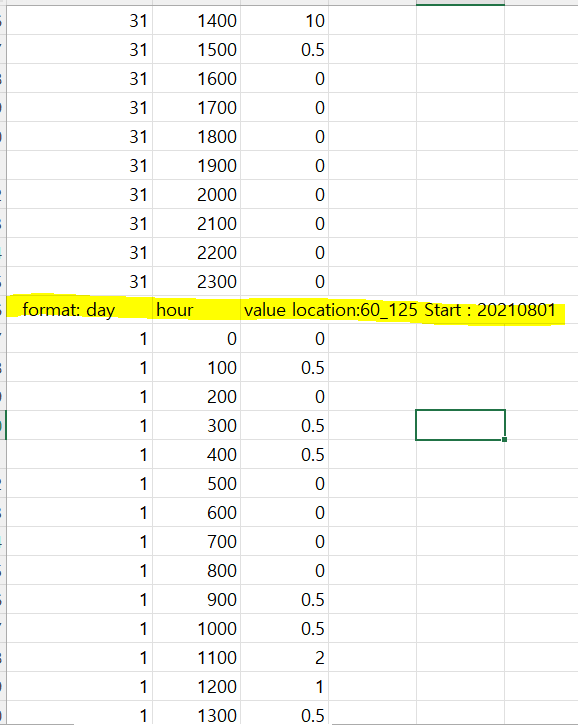

In [ ]:
#정상적인 데이터라면 744개여야하는데
pd.read_csv('/content/weathers/가경동_강수_202108_202108.csv')

format: day  hour  value location:68_106 Start : 20210801 
0               1     0                                 0.000000
1               1   100                                 0.000000
2               1   200                                 0.000000
3               1   300                                 0.000000
4               1   400                                 0.000000
..            ...   ...                                      ...
739            31  1900                                 8.400000
740            31  2000                                 7.900000
741            31  2100                                20.799999
742            31  2200                                 2.200000
743            31  2300                                 0.000000

[744 rows x 3 columns]

In [ ]:
# 그 두배인 1489개가 존재. 정상 프레임을 중복으로 가로방향으로 붙여놓은 형태이다.
pd.read_csv('/content/weathers/반포4동_강수_202108_202108.csv')

format: day   hour value location:60_125 Start : 20210801 
0               1   0000                               0.000000 
1               1   0100                               0.500000 
2               1   0200                               0.000000 
3               1   0300                               0.500000 
4               1   0400                               0.500000 
...           ...    ...                                     ...
1484           31   1900                               0.000000 
1485           31   2000                               0.000000 
1486           31   2100                               0.000000 
1487           31   2200                               0.000000 
1488           31   2300                               0.000000 

[1489 rows x 3 columns]

In [ ]:
error_list

[(60, 126, '한강로동', '/content/weathers/한강로동_기온_202008_202107.csv')]

In [ ]:
location[location['3단계']=='한강로동']

1단계  2단계   3단계  격자 X  격자 Y
44  서울특별시  용산구  한강로동    60   126

In [ ]:
#데이터가 가로로 두번 중복되어 들어있는 형태
test = pd.read_csv('/content/weathers/한강로동_기온_202008_202107.csv')
test

format: day   hour  value location:60_126 Start : 20200801 
0                1    0.0                                27.299999
1                1  100.0                                28.100000
2                1  200.0                                26.299999
3                1  300.0                                24.299999
4                1  400.0                                25.000000
...            ...    ...                                      ...
17539          NaN    NaN                                      NaN
17540          NaN    NaN                                      NaN
17541          NaN    NaN                                      NaN
17542          NaN    NaN                                      NaN
17543                 NaN                                      NaN

[17544 rows x 3 columns]

In [ ]:
#원래 길이는 이러함.
origin = pd.read_csv('/content/weathers/가경동_기온_202008_202107.csv')
origin.columns = ['날짜','시간대','기온']
origin

날짜     시간대         기온
0       1     0.0  29.100000
1       1   100.0  30.000000
2       1   200.0  30.000000
3       1   300.0  29.799999
4       1   400.0  29.299999
...   ...     ...        ...
8766   31  1900.0  26.600000
8767   31  2000.0  26.600000
8768   31  2100.0  27.200001
8769   31  2200.0  27.799999
8770   31  2300.0  28.600000

[8771 rows x 3 columns]

In [ ]:
test = test.loc[:8770]
test

format: day    hour  value location:60_126 Start : 20200801 
0               1     0.0                                27.299999
1               1   100.0                                28.100000
2               1   200.0                                26.299999
3               1   300.0                                24.299999
4               1   400.0                                25.000000
...           ...     ...                                      ...
8766           31  1900.0                                27.799999
8767           31  2000.0                                27.700001
8768           31  2100.0                                27.900000
8769           31  2200.0                                28.100000
8770           31  2300.0                                28.400000

[8771 rows x 3 columns]

In [ ]:
#기존 파일은 삭제
!rm -r '/content/weathers/한강로동_기온_202008_202107.csv'

In [ ]:
#새로 저장
test.to_csv('/content/weathers/한강로동_기온_202008_202107.csv',index=False, encoding="utf-8-sig")

In [ ]:
#확인. 그러나 여전히 에러 리스트에 담김
pd.read_csv('/content/weathers/한강로동_기온_202008_202107.csv')

format: day    hour  value location:60_126 Start : 20200801 
0               1     0.0                                27.299999
1               1   100.0                                28.100000
2               1   200.0                                26.299999
3               1   300.0                                24.299999
4               1   400.0                                25.000000
...           ...     ...                                      ...
8766           31  1900.0                                27.799999
8767           31  2000.0                                27.700001
8768           31  2100.0                                27.900000
8769           31  2200.0                                28.100000
8770           31  2300.0                                28.400000

[8771 rows x 3 columns]

In [ ]:
df= pd.read_csv('/content/weathers/한강로동_기온_202008_202107.csv')
fname = '/content/weathers/한강로동_기온_202008_202107.csv'
start_date = df.columns[-1].strip()[-8:-2]
xy=np.array(df.columns[2].split(':')[1].split()[0].split("_"), dtype=int)
df.columns = ['날짜','시간대','기온']
df = df.astype({'날짜': 'string'})
  
'''날짜 col 재정의'''
df['new'] = np.where(df['시간대'].isna(), df['날짜'] , np.nan) # Start들어있는 행에서 날짜 뽑아넣기 Start 없는 행은 np.nan으로 채우기
df['new'] = df['new'].apply(lambda x : x[-9:-3] if str(x).startswith(' S') else x)
df.loc[0, 'new'] = start_date
df['new'] = df['new'].ffill()
df['new']=df['new']+df['날짜']
df = df.drop(df[df['시간대'].isna()].index) #원래 start들어있던 행 지우기
df = df.drop(['날짜'], axis = 1) #기존 날짜 행 지우고
df.columns = ['시간대','기온','날짜'] #new열을 날짜 열로 새롭게 정의
  
level3 = fname.split("_")[0].split('/')[-1] 
if level3=='대정읍': #대정읍_마라도포함_강수_201908_202007
  level3='대정읍/마라도포함'
  

SiDo = location[(location['격자 X']==xy[0]) & (location['격자 Y']==xy[1]) & (location['3단계']==level3)]['1단계'].values[0]
SiGunGu = location[(location['격자 X']==xy[0]) & (location['격자 Y']==xy[1]) & (location['3단계']==level3)]['2단계'].values[0]
    
'''컬럼 추가 후 값 넣기'''
df['읍면동'] = level3 
df['광역시도'] = SiDo
df['시군구'] = SiGunGu

'''시간대 배달데이터 형태로 바꾸기'''
df = df.astype({'시간대': 'int'})
df['시간대'] = [hour//100 if hour != 0 else hour for hour in df['시간대']]                  
    
'''datetime형식으로 변환'''
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m%d')
    
'''재정렬 및 합칠 데이터프레임 리스트 만들기'''
df = df[['광역시도','시군구','읍면동', '날짜', '시간대',  '기온']]

df

광역시도  시군구   읍면동         날짜  시간대         기온
0     서울특별시  용산구  한강로동 2020-08-01    0  27.299999
1     서울특별시  용산구  한강로동 2020-08-01    1  28.100000
2     서울특별시  용산구  한강로동 2020-08-01    2  26.299999
3     서울특별시  용산구  한강로동 2020-08-01    3  24.299999
4     서울특별시  용산구  한강로동 2020-08-01    4  25.000000
...     ...  ...   ...        ...  ...        ...
8766  서울특별시  용산구  한강로동 2021-07-31   19  27.799999
8767  서울특별시  용산구  한강로동 2021-07-31   20  27.700001
8768  서울특별시  용산구  한강로동 2021-07-31   21  27.900000
8769  서울특별시  용산구  한강로동 2021-07-31   22  28.100000
8770  서울특별시  용산구  한강로동 2021-07-31   23  28.400000

[8760 rows x 6 columns]

In [ ]:
len(concat_list)

5265

In [ ]:
len(temp2)

5266

In [ ]:
concat_list.append(df)
len(concat_list)

5266